<a href="https://colab.research.google.com/github/add54/-docs-Dwyer-G.-Aggarwal-S.-Stouffer-J.---Flask-Building-Python-Web-Services---2017.pdf-/blob/master/Extracting_and_Analyzing_Weather_Data_using_Meteostat_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction:
Weather data is an essential input for a variety of applications such as retail demand, agriculture, transportation, energy, and many more. With the advancement of technology and the availability of free weather APIs, it has become easier than ever to access and analyze historical and real-time weather data. In this article, we will explore the Meteostat API, which provides free access to high-quality weather data for over 40,000 stations worldwide. We will learn how to extract historical weather data for a set of stations, perform basic data cleaning and analysis using Python, and visualize the results.

Let’s start by examining the code snippet below, which shows how to extract historical weather data for a set of stations using the Meteostat API. We will use Python and the meteostat package, which provides a convenient interface to access the Meteostat API.

##Setting up the Environment
First, we need to install the necessary packages. We will be using the pandas and meteostatand geopandas packages for this project. Run the following command to install these packages:

In [1]:
!pip install pandas meteostat
!pip install geopandas

##Next, we will import the necessary libraries and set up the start and end dates for our data retrieval. We will be retrieving data from January 1, 2017, to yesterday’s date. Here’s the code to set up the environment:

In [2]:
from datetime import datetime, timedelta
import pandas as pd
from meteostat import Stations, Daily

# Set start date to January 1st, 2017
start = datetime(2017, 1, 1)

# Set end date to yesterday's date
end = datetime.now() - timedelta(days=1)

#Retrieving Data for Multiple Stations
#We will be retrieving data for multiple weather stations across Europe. Here’s a table containing the details of the stations:


city and WMO respective WMO codes

#We will be defining a function to retrieve data for a given station. The function will take the WMO Station Code, country, and city as input and return a Pandas DataFrame with the weather data.

Here’s the code to define the function:

In [5]:
# Define a function to get data for a given station
def get_data(station, country, city, wmo_code):
    data = Daily(station, start, end).fetch()
    data.insert(0, 'station', f'{country}-{city}-{wmo_code}')
    data['sun_hours'] = round(data['tsun'] / 60, 2)
    data['country'] = country
    data['city'] = city
    data['wmo_station_code'] = wmo_code
    return data[['country', 'city', 'wmo_station_code', 'station',
                 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd',
                 'wpgt', 'pres', 'tsun', 'sun_hours']]

#Now that we have a function to retrieve data for a given station, we can loop through our list of stations and concatenate the data into a single data frame.

In [10]:
#Define a list containing country, city, and WMO code for each station

stations = [
('DE', 'Berlin', '10382'),
('DE', 'Düsseldorf', '10400'),
('FR', 'Paris', '07156'),
('BE', 'Brussels', '06451'),
('NL', 'Amsterdam', '06240'),
('ES', 'Madrid', '08222'),
('IT', 'Rome', '16245'),
('CH', 'Zurich', '06666'),
('PL', 'Warsaw', '12375'),
('AT', 'Vienna', '11035'),
('HU', 'Budapest', '12840'),
('RO', 'Bucharest', '15420'),
('RS', 'Belgrade', '13274'),
('SI', 'Ljubljana', '14610'),
('SK', 'Bratislava', '11901'),
('CZ', 'Prague', '11520'),
('HR', 'Zagreb', '14236')
]

#Get data for each station and concatenate it into a single DataFrame

dfs = []
for country, city, wmo_code in stations:
    station_data = get_data(wmo_code, country, city, wmo_code)
    dfs.append(station_data)

weather_data = pd.concat(dfs)

# Reset index and rename resulting column to 'date'
weather_data = weather_data.reset_index().rename(columns={'index': 'date'})

# Print data
print(weather_data)

            time country    city wmo_station_code          station  tavg  \
0     2017-01-01      DE  Berlin            10382  DE-Berlin-10382   3.2   
1     2017-01-02      DE  Berlin            10382  DE-Berlin-10382   0.3   
2     2017-01-03      DE  Berlin            10382  DE-Berlin-10382   2.6   
3     2017-01-04      DE  Berlin            10382  DE-Berlin-10382   2.5   
4     2017-01-05      DE  Berlin            10382  DE-Berlin-10382  -3.0   
...          ...     ...     ...              ...              ...   ...   
39955 2024-06-29      HR  Zagreb            14236  HR-Zagreb-14236  27.8   
39956 2024-06-30      HR  Zagreb            14236  HR-Zagreb-14236  28.3   
39957 2024-07-01      HR  Zagreb            14236  HR-Zagreb-14236  25.0   
39958 2024-07-02      HR  Zagreb            14236  HR-Zagreb-14236  21.0   
39959 2024-07-03      HR  Zagreb            14236  HR-Zagreb-14236  20.5   

       tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres   tsun  sun_hours  
0       0.

#We can also add some additional columns to the DataFrame. Let’s add ‘month’ & ‘year’ columns to make it easier to analyze data by month and year.

In [16]:
if 'date' in weather_data.columns:
    weather_data['date'] = pd.to_datetime(weather_data['date'])
    weather_data.insert(1, 'month', weather_data['date'].dt.month)
    weather_data.insert(2, 'year', weather_data['date'].dt.year)
else:
    print("The 'date' column does not exist in the DataFrame.")

The 'date' column does not exist in the DataFrame.


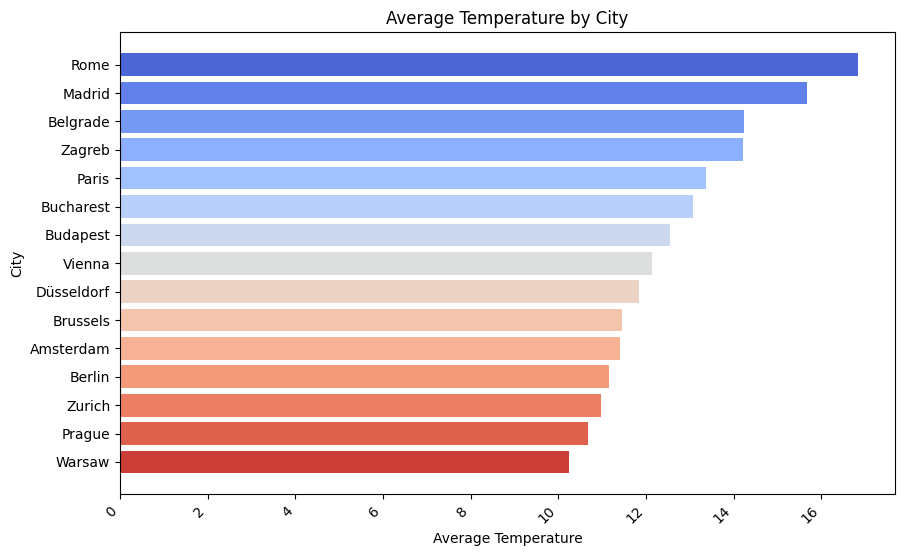

In [19]:
# Group data by city and calculate mean temperature
import seaborn as sns
import matplotlib.pyplot as plt
avg_temp = weather_data.groupby(['city'])['tavg'].mean().reset_index()

# Sort data by average temperature in ascending order
avg_temp = avg_temp.sort_values('tavg')
avg_temp

# Create a color palette with a gradient from blue to red
colors = sns.color_palette("coolwarm_r", len(avg_temp))

# Create horizontal bar chart with multiple colors
plt.figure(figsize=(10, 6))
plt.barh(avg_temp['city'], avg_temp['tavg'], color=colors)

# Add labels and title
plt.xlabel('Average Temperature')
plt.ylabel('City')
plt.title('Average Temperature by City')

# Adjust tick labels
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

In [20]:
import plotly.express as px
import geopandas as gpd

# Read country data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# List of country names in mainland Europe (excluding overseas territories)
european_countries = ['France','Germany', 'Belgium', 'Netherlands', 'Spain',
                      'Italy', 'Switzerland', 'Poland', 'Austria', 'Hungary',
                      'Romania', 'Serbia', 'Slovenia', 'Slovakia', 'Czechia',
                      'Croatia']

# Filter the world GeoDataFrame to include only countries in mainland Europe
europe = world[world['name'].isin(european_countries)]

# Create a dictionary mapping cities to countries
city_to_country = {
    'Berlin': 'Germany',
    'Paris': 'France',
    'Brussels': 'Belgium',
    'Amsterdam': 'Netherlands',
    'Madrid': 'Spain',
    'Rome': 'Italy',
    'Zurich': 'Switzerland',
    'Warsaw': 'Poland',
    'Vienna': 'Austria',
    'Budapest': 'Hungary',
    'Bucharest': 'Romania',
    'Belgrade': 'Serbia',
    'Ljubljana': 'Slovenia',
    'Bratislava': 'Slovakia',
    'Prague': 'Czechia',
    'Zagreb': 'Croatia'
}

# Add country information to the average temperature data
avg_temp['country'] = avg_temp['city'].map(city_to_country)

# Merge the average temperature data with the country data
merged = europe.merge(avg_temp, left_on='name', right_on='country')

fig = px.choropleth_mapbox(merged,
                           geojson=merged.geometry,
                           locations=merged.index,
                           color='tavg',
                           color_continuous_scale='RdBu_r',
                           range_color=(merged['tavg'].min(), merged['tavg'].max()),
                           mapbox_style='carto-positron',
                           zoom=3.5,
                           center={'lat': 50, 'lon': 10},
                           opacity=0.9,
                           hover_name=merged['name'],
                           hover_data={'tavg': ':.1f°C'})

# Update hover data to display temperature as a label
fig.update_traces(hovertemplate='Country: %{hovertext}<br>Average Temperature: %{customdata[0]:.1f}°C')

# Add country names and average temperature values to the plot
for i, row in merged.iterrows():
    fig.add_annotation(x=row.geometry.centroid.x,
                       y=row.geometry.centroid.y,
                       text=f"{row['name']}\n{row['tavg']:.1f}°C",
                       showarrow=False,
                       font=dict(size=20))

fig.update_layout(title='Average Temperature by Country in Europe',
                  mapbox_style='carto-positron',
                  margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
                  mapbox=dict(center={'lat': 50, 'lon': 10}, zoom=3.5))

# Increase the height of the map
fig.update_layout(height=1200)

fig.show()

##Box plots are a great way to view the distribution of a dataset, but they can be enhanced with additional visualizations. By using the code provided, you can create an interactive map visualization of the average temperature by country in Europe, adding a new dimension to your analysis:-